<a href="https://colab.research.google.com/github/a7mednazeer/object-detection/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Jan 13 10:38:16 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [4]:
!pip install -U ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('AhmedNazeer')
rf = Roboflow(api_key="a7a1iOhqxKIhBfyy3LoF")

workspace = rf.workspace("liangdianzhong")
project = rf.workspace("ahmed-nazeer-iddzz").project("materials-classification")
version = project.version(1)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Materials-Classification-1 in yolov11:: 100%|██████████| 15072/15072 [00:02<00:00, 5648.59it/s]


In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11m.pt data=/content/datasets/materials/data.yaml epochs=10 imgsz=640 plots=True

/content
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/datasets/materials/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

In [10]:
!ls runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1736765164.9234c185c0f7.2703.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


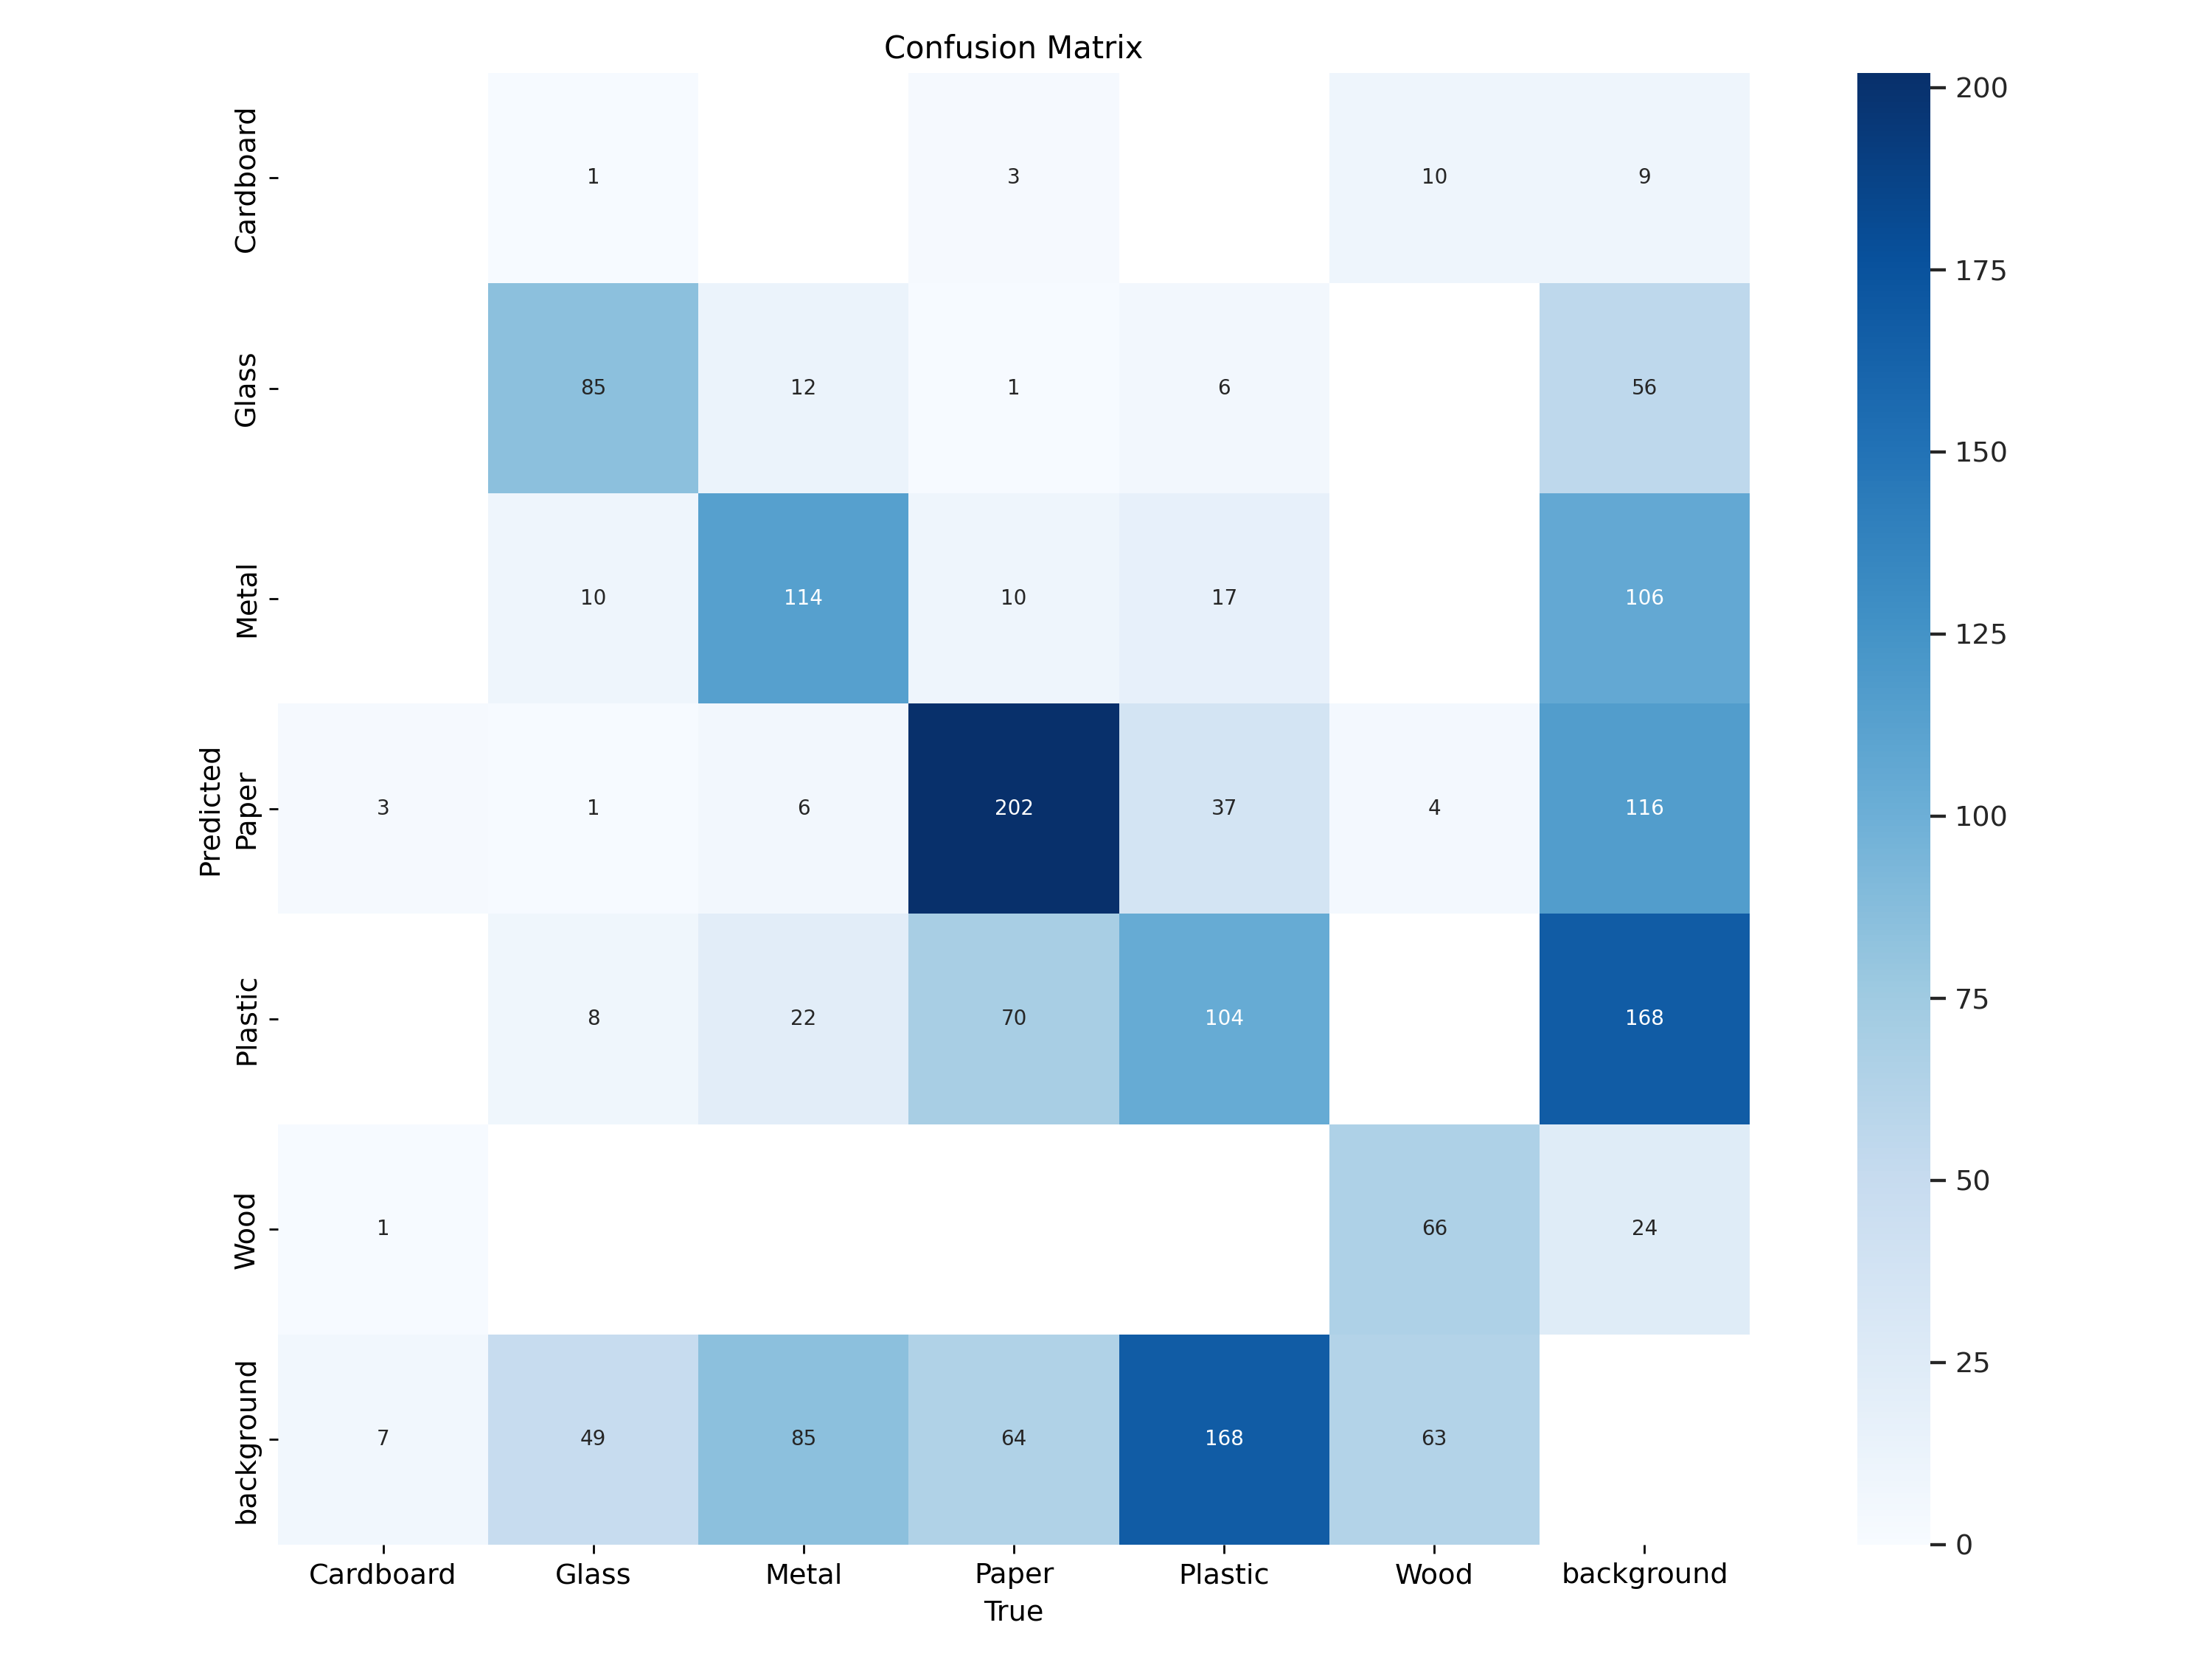

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train/confusion_matrix.png', width=600)

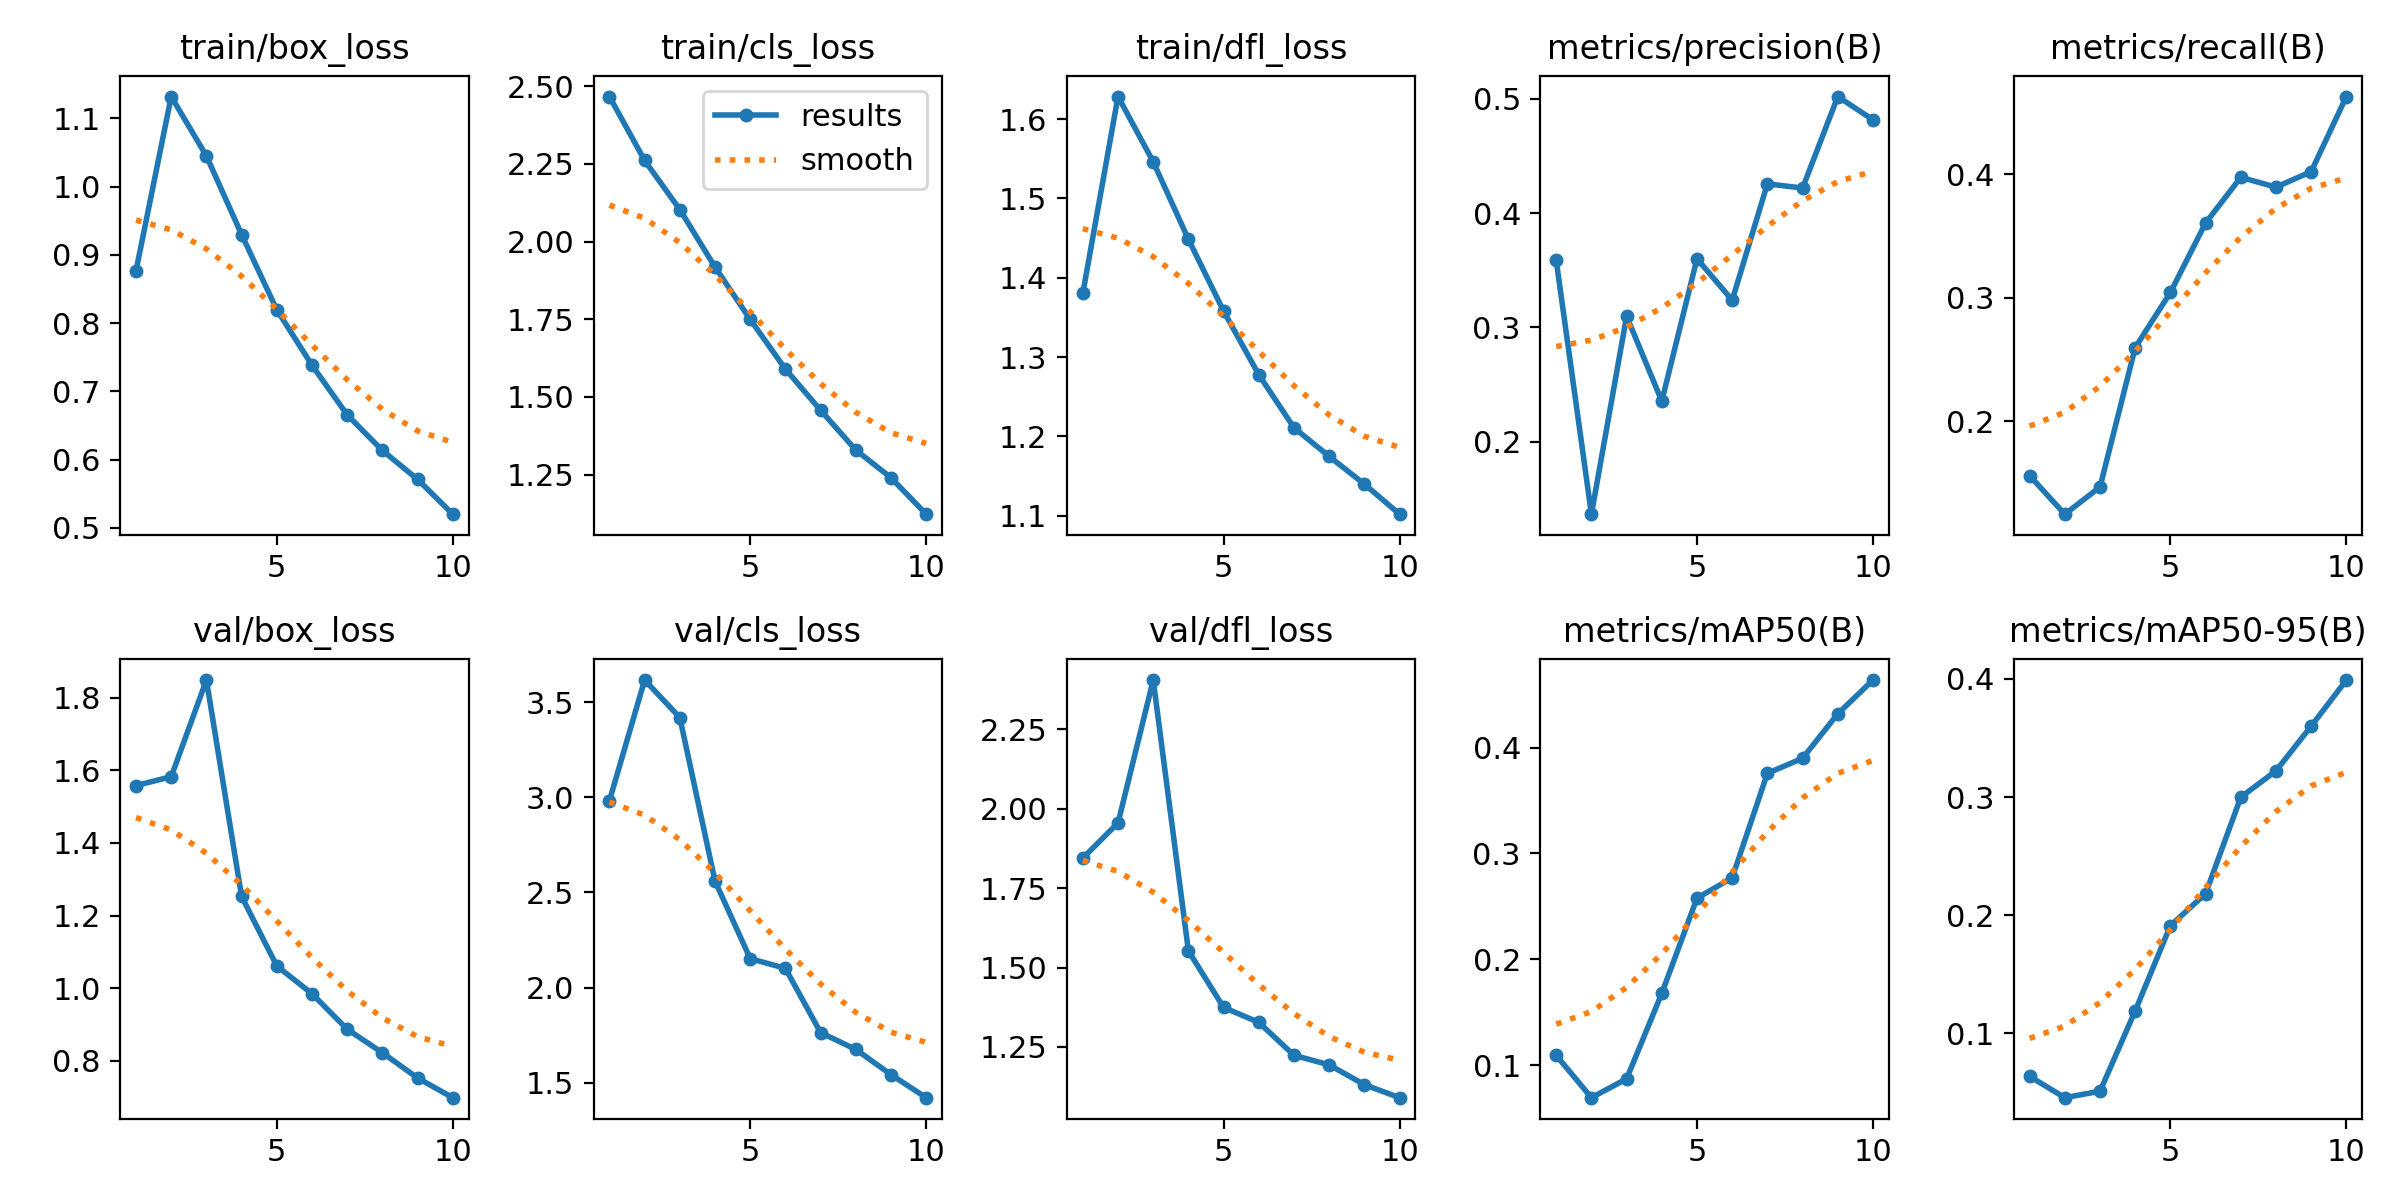

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train/results.png', width=600)

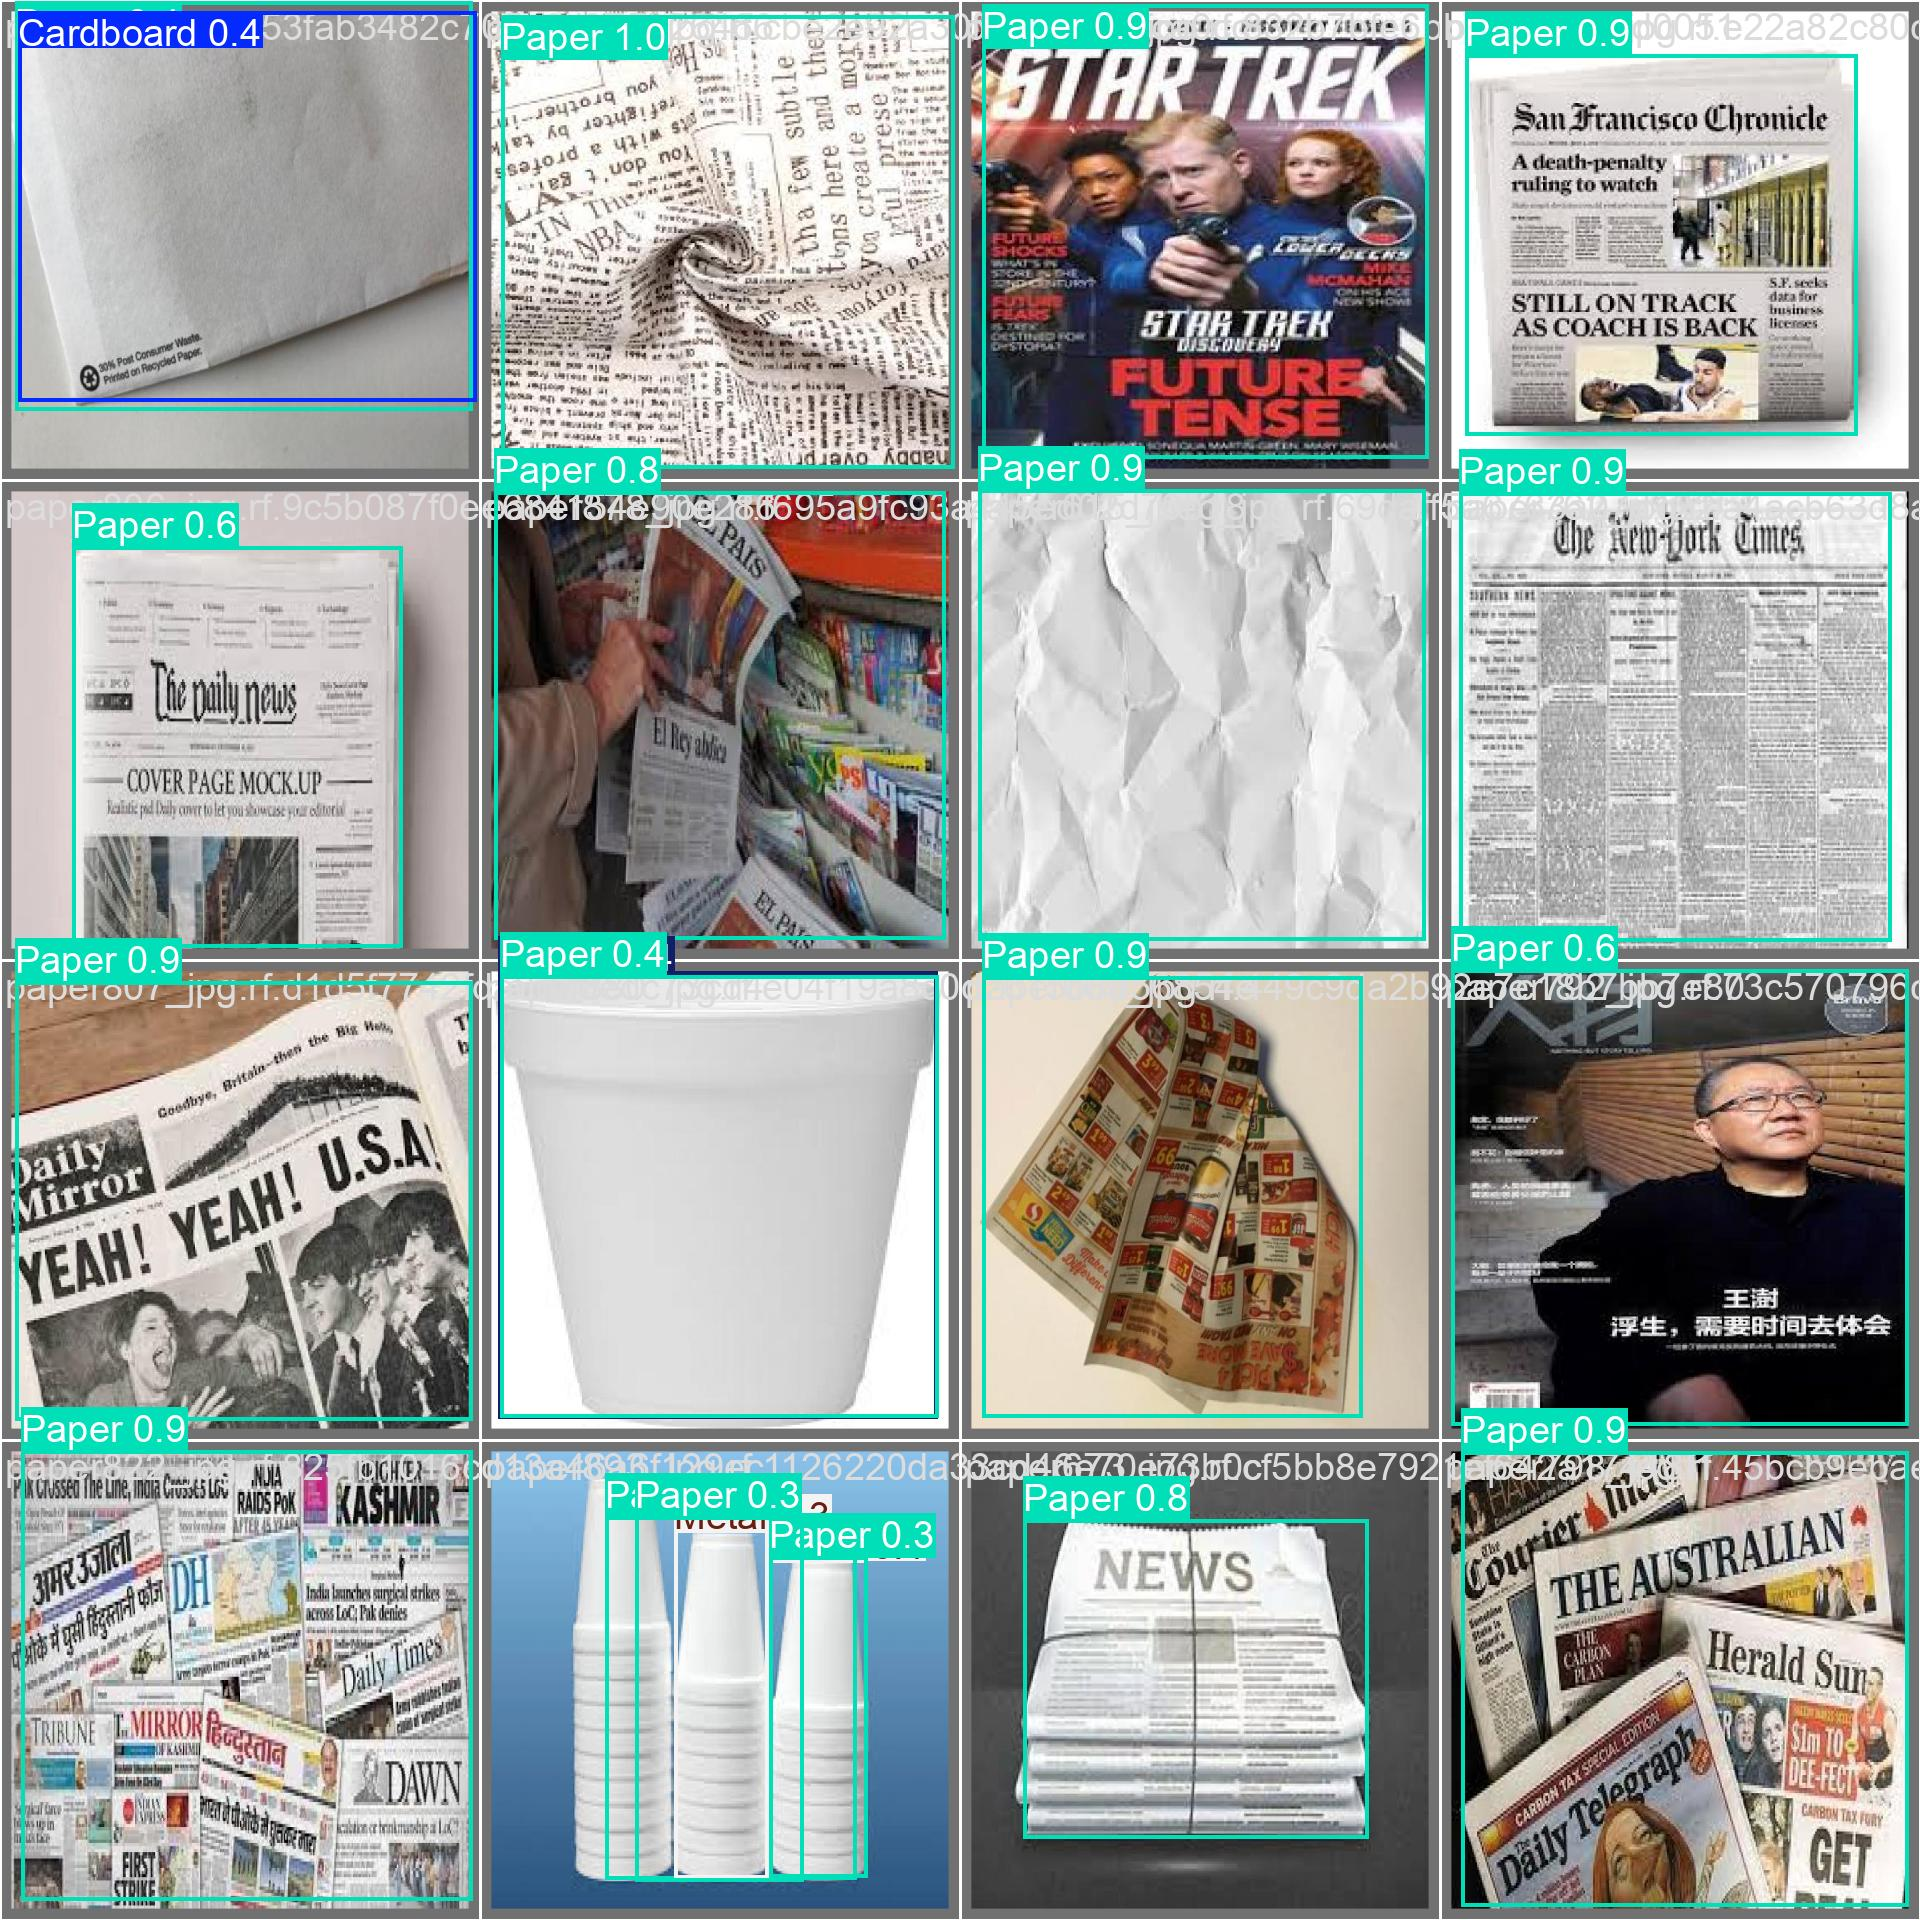

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

In [14]:
%cd {HOME}

!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/datasets/materials/data.yaml

/content
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /content/datasets/materials/valid/labels.cache... 792 images, 75 backgrounds, 0 corrupt: 100% 792/792 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1185, len(boxes) = 1229. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 50/50 [00:22<00:00,  2.26it/s]
                   all        792       1229      0.481      0.462      0.464      0.399
             Cardboard          8         11     0.0315     0.0688     0.0171     0.0122
                 Glass        115        154      0.561      0.584      0.598      0.486
                 Metal  

In [15]:
%cd {HOME}

!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/materials/test/images save=True

/content
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs

image 1/421 /content/datasets/materials/test/images/-12-_jpg.rf.a94484347540878c50c53e155bf1f2e4.jpg: 640x640 1 Glass, 36.8ms
image 2/421 /content/datasets/materials/test/images/-148_jpg.rf.099088112060b9d6711a3045c69fe131.jpg: 640x640 1 Metal, 1 Plastic, 36.9ms
image 3/421 /content/datasets/materials/test/images/-164_jpg.rf.51fcb0a3d450d0c8ecf839fc37a11607.jpg: 640x640 1 Glass, 3 Metals, 36.9ms
image 4/421 /content/datasets/materials/test/images/-19-_jpg.rf.a34865b998e47c1ba22a43eeb2b63a63.jpg: 640x640 (no detections), 36.8ms
image 5/421 /content/datasets/materials/test/images/-1_jpg.rf.54c136f3529a56f10c968fd70cbf1ebd.jpg: 640x640 3 Metals, 36.8ms
image 6/421 /content/datasets/materials/test/images/-22-_jpg.rf.57abd852a545eb78e9279689c31b893c.jpg: 640x640 1 Glass, 1 Metal, 22.7ms
image 7/421 /content/datasets/

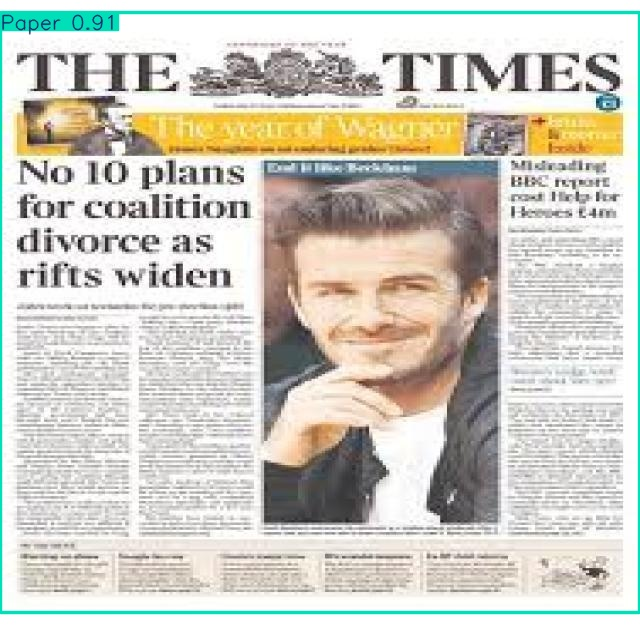

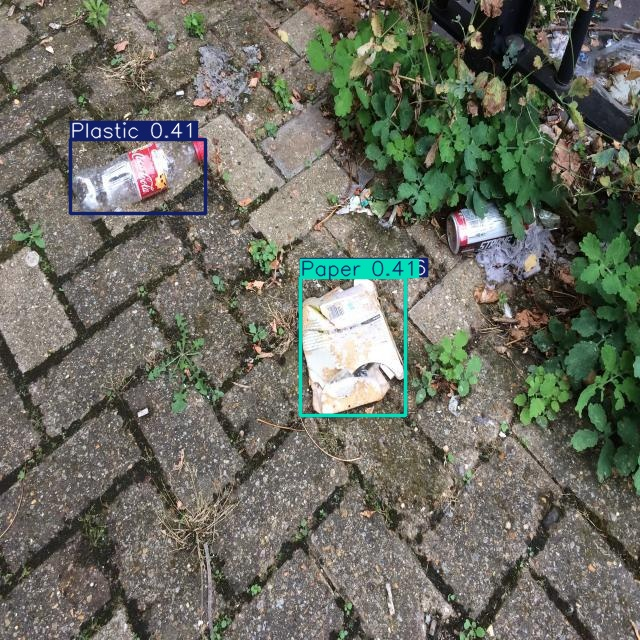

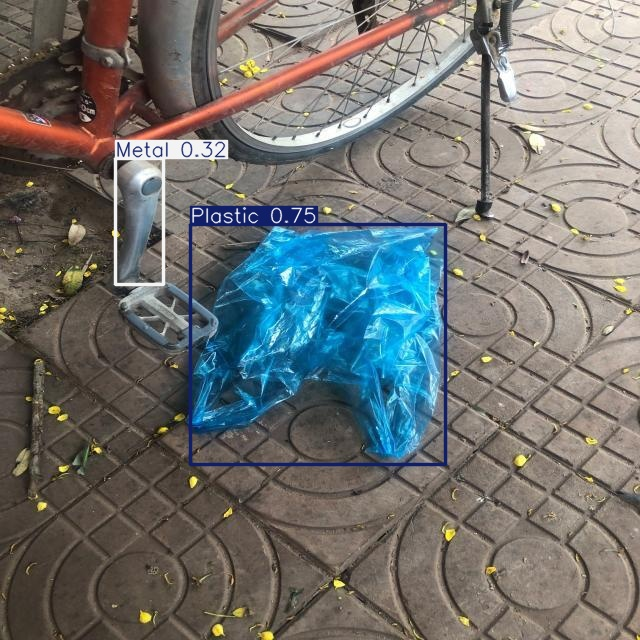

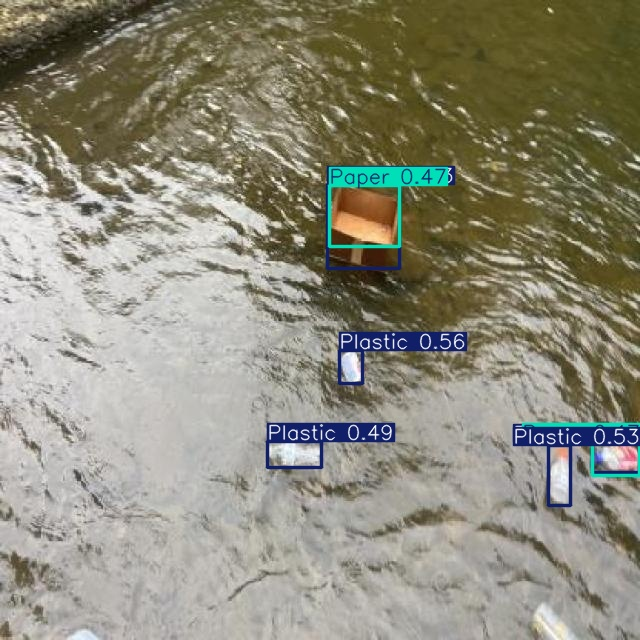

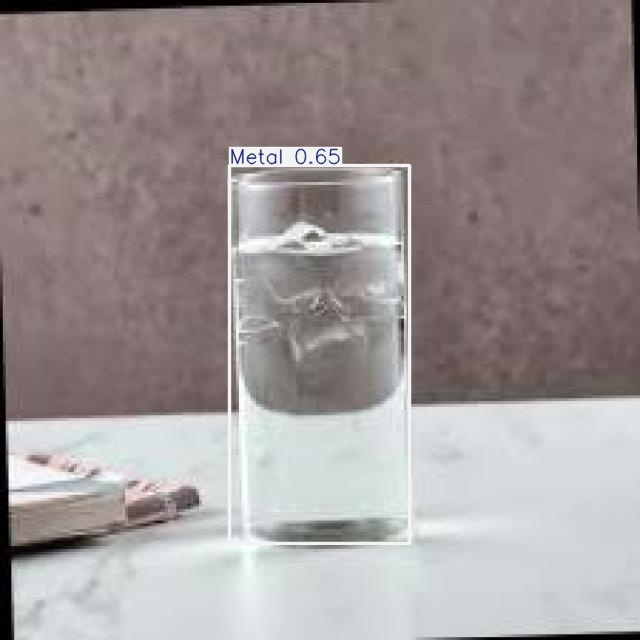

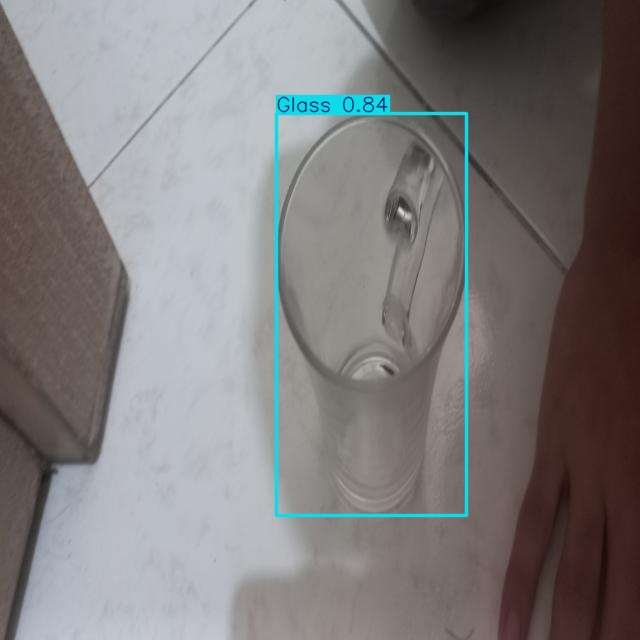

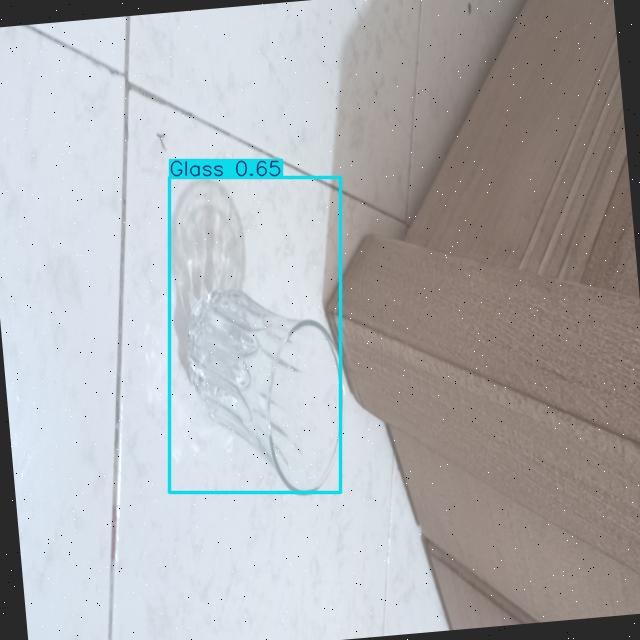

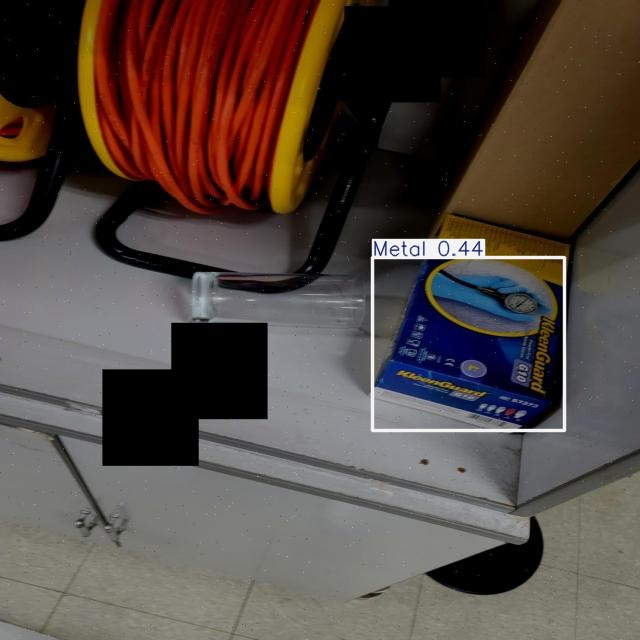

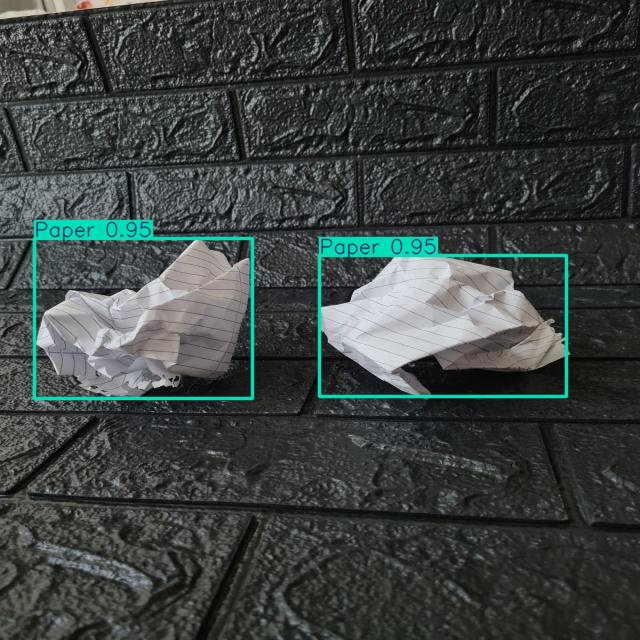

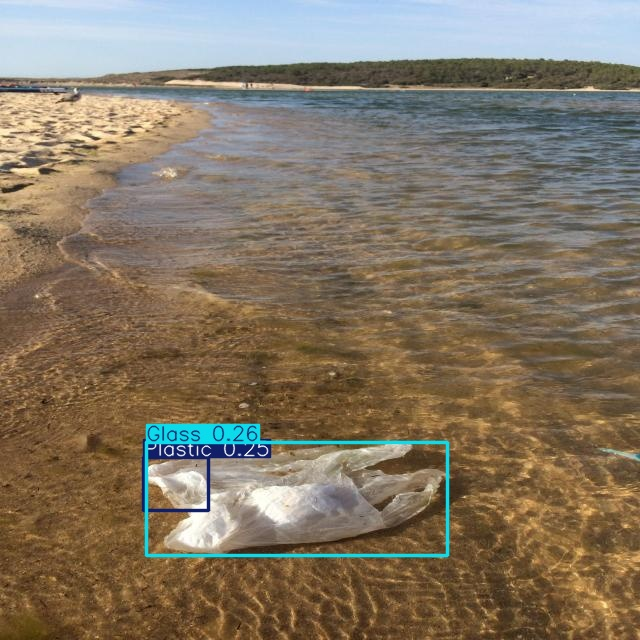

In [16]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:10]:
    display(IPyImage(filename=img, width=200))
    print("\n")